In [8]:
# Set langsmith tracing
from langchain_teddynote import logging
from configs import llm
from pprint import pprint
# input your project name
logging.langsmith("Test_Calling_Tools")

LangSmith 추적을 시작합니다.
[프로젝트명]
Test_Calling_Tools


In [2]:
from langchain_core.messages import AIMessage
from langchain_core.tools import tool
from langchain_experimental.tools.python.tool import PythonAstREPLTool
from langchain_teddynote.tools import GoogleNews
from typing import List, Dict


# 도구 생성
@tool
def search_news(query: str) -> List[Dict[str, str]]:
    """Search Google News by input keyword"""
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=5)


@tool
def python_code_interpreter(code: str):
    """Call to execute python code."""
    return PythonAstREPLTool().invoke(code)


In [3]:
# Call tools
from langgraph.prebuilt import ToolNode, tools_condition

# Make tool list
tools = [search_news,python_code_interpreter]

# initiate ToolNode
tool_node = ToolNode(tools)


In [4]:
message_with_single_tool_call = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "search_news", # 도구 이름
            "args": {"query": "AI"}, # 도구 인자
            "id": "tool_call_id", # 도구 호출 ID
            "type": "tool_call", # 도구 호풀 유형
            
        }
    ],
)

In [5]:
tool_node.invoke(
    {
        "messages": [message_with_single_tool_call]
    }
)

{'messages': [ToolMessage(content='[{"url": "https://news.google.com/rss/articles/CBMigwFBVV95cUxNNkxZWV9FVWUwd2dsM20tRExJYTBISXJfQWpYY0dUa1ptWWJoajNUOWFlVnN6X0tjYnRRaDJrZFhuLTQzSnZhUmx0dERLQTdSMjU0QkZsbWd1VmR5Y2NudFhFZkFJLUJwdllsY0FMd0FYY3RhYm4wdmRuVWRIMUlwOXF6Z9IBlwFBVV95cUxQMmREZko2R1pFQ0gyLTlGMkdCT3Y1VXJFV3dkN3NrRGY5dWx4TE16ZFVKejhpWGdUMWppTFg5ckZRbW1uX2ZveW5RdTE2M2o4R0cxeV8yWDRoTVh5UFRIOGcxdHhCb1h6UHptZi1vZE1sTlRCQXYxVnZGM0o5QmIyY2trWXB5NVZzTC00cEIxZlV5R3kzdHNN?oc=5", "content": "증시 흔든 AI 버블론, 닷컴 버블 때완 다르다? - 조선일보"}, {"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE5CdTNxcUZEeDh4dnFJdnJLaFdRdXFWWExjbGFrNGZVTHJBY0hJd3paOHJlT0wxR0UzSGUwaVQ2SjkxZFRYZVljMllsdEdCRnhIc2FGQTFsY3hvZTF2cGpNMHJJd0ZTcWZJMnc?oc=5", "content": "오픈AI, 월 매출 1.4조 돌파...\\"GPT-5 출시로 컴퓨팅 수요 폭발\\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiX0FVX3lxTE8tRFRKOVEzMGMxUXpmakh1Rl84bzMyTnJybmM0QzBGZ2VNQUxmaHpXVUdaQ2M0TkduaUNsZC0zMTBMV29PTGV3T2JwaGZnYlphT185eV9pSmVPMXFmVmJz?oc=5", "content": "\\"

In [9]:
# 다중 도구 호출을 포함하는 AI 메시지 객체 생성 및 초기화
message_with_multiple_tool_calls = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "search_news",
            "args": {"query": "AI"},
            "id": "tool_call_id",
            "type": "tool_call",
        },
        {
            "name": "python_code_interpreter",
            "args": {"code": "print(1+2+3+4)"},
            "id": "tool_call_id",
            "type": "tool_call",
        },
    ],
)

# 생성된 메시지를 도구 노드에 전달하여 다중 도구 호출 실행
pprint(tool_node.invoke({"messages": [message_with_multiple_tool_calls]}))


{'messages': [ToolMessage(content='[{"url": "https://news.google.com/rss/articles/CBMigwFBVV95cUxNNkxZWV9FVWUwd2dsM20tRExJYTBISXJfQWpYY0dUa1ptWWJoajNUOWFlVnN6X0tjYnRRaDJrZFhuLTQzSnZhUmx0dERLQTdSMjU0QkZsbWd1VmR5Y2NudFhFZkFJLUJwdllsY0FMd0FYY3RhYm4wdmRuVWRIMUlwOXF6Z9IBlwFBVV95cUxQMmREZko2R1pFQ0gyLTlGMkdCT3Y1VXJFV3dkN3NrRGY5dWx4TE16ZFVKejhpWGdUMWppTFg5ckZRbW1uX2ZveW5RdTE2M2o4R0cxeV8yWDRoTVh5UFRIOGcxdHhCb1h6UHptZi1vZE1sTlRCQXYxVnZGM0o5QmIyY2trWXB5NVZzTC00cEIxZlV5R3kzdHNN?oc=5", "content": "증시 흔든 AI 버블론, 닷컴 버블 때완 다르다? - 조선일보"}, {"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE5CdTNxcUZEeDh4dnFJdnJLaFdRdXFWWExjbGFrNGZVTHJBY0hJd3paOHJlT0wxR0UzSGUwaVQ2SjkxZFRYZVljMllsdEdCRnhIc2FGQTFsY3hvZTF2cGpNMHJJd0ZTcWZJMnc?oc=5", "content": "오픈AI, 월 매출 1.4조 돌파...\\"GPT-5 출시로 컴퓨팅 수요 폭발\\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiX0FVX3lxTE8tRFRKOVEzMGMxUXpmakh1Rl84bzMyTnJybmM0QzBGZ2VNQUxmaHpXVUdaQ2M0TkduaUNsZC0zMTBMV29PTGV3T2JwaGZnYlphT185eV9pSmVPMXFmVmJz?oc=5", "content": "\\"

In [17]:
# LLM 모델 초기화 및 도구 바인딩
model_with_tools = llm.bind_tools(tools)


In [22]:
# 도구 호출 확인
pprint(
    model_with_tools.invoke("처음 5개의 소수를 출력하는 python code 를 작성해줘").tool_calls
)


[{'args': {'code': '\n'
                   'primes = []\n'
                   'num = 2\n'
                   'while len(primes) < 5:\n'
                   '    is_prime = True\n'
                   '    if num < 2:\n'
                   '        is_prime = False\n'
                   '    else:\n'
                   '        for i in range(2, int(num**0.5) + 1):\n'
                   '            if num % i == 0:\n'
                   '                is_prime = False\n'
                   '                break\n'
                   '    if is_prime:\n'
                   '        primes.append(num)\n'
                   '    num += 1\n'
                   'print(primes)\n'},
  'id': 'ddfb6c08-c350-40c1-a1a2-4484c63c56d5',
  'name': 'python_code_interpreter',
  'type': 'tool_call'}]


In [23]:
# 도구 노드를 통한 메시지 처리 및 LLM 모델의 도구 기반 응답 생성
tool_node.invoke(
    {
        "messages": [
            model_with_tools.invoke(
                "처음 5개의 소수를 출력하는 python code 를 작성해줘"
            )
        ]
    }
)


{'messages': [ToolMessage(content='[2, 3, 5, 7, 11]\n', name='python_code_interpreter', tool_call_id='acd45f2b-6a7a-4565-84a0-d4755d43d0f5')]}

In [24]:
# LangGraph 워크플로우 상태 및 메시지 처리를 위한 타입 임포트
from langgraph.graph import StateGraph, MessagesState, START, END


# LLM 모델을 사용하여 메시지 처리 및 응답 생성, 도구 호출이 포함된 응답 반환
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}


# 메시지 상태 기반 워크플로우 그래프 초기화
workflow = StateGraph(MessagesState)

# 에이전트와 도구 노드 정의 및 워크플로우 그래프에 추가
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# 워크플로우 시작점에서 에이전트 노드로 연결
workflow.add_edge(START, "agent")

# 에이전트 노드에서 조건부 분기 설정, 도구 노드 또는 종료 지점으로 연결
workflow.add_conditional_edges("agent", tools_condition)

# 도구 노드에서 에이전트 노드로 순환 연결
workflow.add_edge("tools", "agent")

# 에이전트 노드에서 종료 지점으로 연결
workflow.add_edge("agent", END)


# 정의된 워크플로우 그래프 컴파일 및 실행 가능한 애플리케이션 생성
app = workflow.compile()


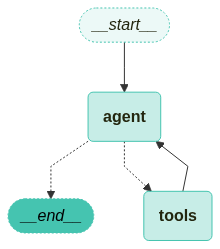

In [25]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)


In [26]:
# 실행 및 결과 확인
for chunk in app.stream(
    {"messages": [("human", "1부터 10까지 팩토리얼 연산하는 과정을 출력하는 python code 를 작성해줘")]},
    stream_mode="values",
):
    # 마지막 메시지 출력
    chunk["messages"][-1].pretty_print()


================================ Human Message =================================

1부터 10까지 팩토리얼 연산하는 과정을 출력하는 python code 를 작성해줘
================================== Ai Message ==================================
Tool Calls:
  python_code_interpreter (5f9a177b-493c-4170-8cb3-0dd0a2547014)
 Call ID: 5f9a177b-493c-4170-8cb3-0dd0a2547014
  Args:
    code: 
def factorial_process():
    for i in range(1, 11):
        factorial = 1
        process_parts = []
        for j in range(i, 0, -1):
            factorial *= j
            process_parts.append(str(j))
        
        if i == 1:
            process_string = f"1! = 1"
        else:
            process_string = f"{i}! = {' * '.join(process_parts)} = {factorial}"
        
        print(process_string)

factorial_process()
================================= Tool Message =================================
Name: python_code_interpreter

1! = 1
2! = 2 * 1 = 2
3! = 3 * 2 * 1 = 6
4! = 4 * 3 * 2 * 1 = 24
5! = 5 * 4 * 3 * 2 * 1 = 120
6! = 6 * 5 * 4 *

In [20]:
# 검색 질문 수행
for chunk in app.stream(
    {"messages": [("human", "search google news about GPT-5")]},
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()


================================ Human Message =================================

search google news about GPT-5
================================== Ai Message ==================================
Tool Calls:
  search_news (1fe8e9ed-1db9-4546-976d-a096fba09371)
 Call ID: 1fe8e9ed-1db9-4546-976d-a096fba09371
  Args:
    query: GPT-5
================================= Tool Message =================================
Name: search_news

[{"url": "https://news.google.com/rss/articles/CBMiTEFVX3lxTFBVLU1aYzNnSTJkNnZPRGdzS0x4cU1lMGFFNGxiQ29pVnA1YjFvczA2Y3FUeEUxTmZIeFU0N1ZHc3d5d1N1Y2UxcXlaYm4?oc=5", "content": "GPT-5 성능 예상보다 별로인 이유, 자금 부족 때문? - 바이라인네트워크"}, {"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTE9jbnJXMGg5anZIYTNwT1JMQnNwQkJmUzlRejFUcEhYNklfYXpSLUYxLWx1QVlrNTU3eFhpd05uYl95UVMwXzhHdlE3LXhfekRiU1lnOGxn?oc=5", "content": "무하유, GPT킬러에 'GPT-5' 탐지 기능 추가 - 지디넷코리아"}, {"url": "https://news.google.com/rss/articles/CBMiUkFVX3lxTE1zalZSMkVmaXd6NnVWLUw2NFpCQkRIQ1U2RDhwM3NZMXo0aGZxbElzOTFvUVcx